# Model Development

## In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.







## Some questions we want to ask in this module

## Do I know if the dealer is offering fair value for my trade-in?
## Do I know if I put a fair value on my car?
## In data analytics, we often use Model Development to help us predict future observations from the data we have.

## A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [2]:
import piplite
await piplite.install('seaborn')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [10]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

In [12]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Linear Regression and Multiple Linear Regression
## Linear Regression






### One example of a Data Model that we will be using is:

### Simple Linear Regression
### Simple Linear Regression is a method to help us understand the relationship between two variables:

### The predictor/independent variable (X)
### The response/dependent variable (that we want to predict)(Y

## Let's load the modules for linear regression:

In [18]:
from sklearn.linear_model import LinearRegression

# Create the linear regression object

In [23]:
lm = LinearRegression()
lm

LinearRegression()

# How could "highway-mpg" help us predict car price?

## For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [20]:
X = df[['highway-mpg']]
Y = df['price']

## Fit the linear model using highway-mpg

In [22]:
lm.fit(X,Y)

LinearRegression()

# We can output a prediction:

In [24]:
Yhat=lm.predict(X)
Yhat[0:5]   

<class 'sklearn.exceptions.NotFittedError'>: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## What is the value of the intercept (a)

In [25]:
lm.intercept_

<class 'AttributeError'>: 'LinearRegression' object has no attribute 'intercept_'

## What is the value of the slope (b)?

In [16]:
lm.coef_

<class 'AttributeError'>: 'LinearRegression' object has no attribute 'coef_'

## What is the final estimated linear model we get?

## As we saw above, we should get a final linear model with the structure

# Yhat = a + bX

## Plugging in the actual values we get:

# Price = 38423.31 - 821.73 x highway-mpg

# Question #1 a):
## Create a linear regression object called "lm1".

In [28]:
lm1 = LinearRegression()
lm1

LinearRegression()

## Question #1 b): 
## Train the model using "engine-size" as the independent variable and "price" as the dependent variable

In [29]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

## Question #1 c):¶
## Find the slope and intercept of the model

In [30]:
# Slope 
lm1.coef_

# Intercept
lm1.intercept_

array([-7963.33890628])

## Question #1 d): 
## What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price"

In [32]:
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

# Multiple Linear Regression

In [33]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [34]:
lm.fit(Z, df['price'])

LinearRegression()

In [35]:
lm.intercept_

-15806.62462632922

In [36]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

# Question #2 a): 
## Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg"

In [41]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

# Question #2 b): 
## Find the coefficient of the model

In [46]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [ ]:
# 2. Model Evaluation Using Visualization

In [47]:
import seaborn as sns
%matplotlib inline 

## Regression Plot

(0.0, 48174.692546530314)

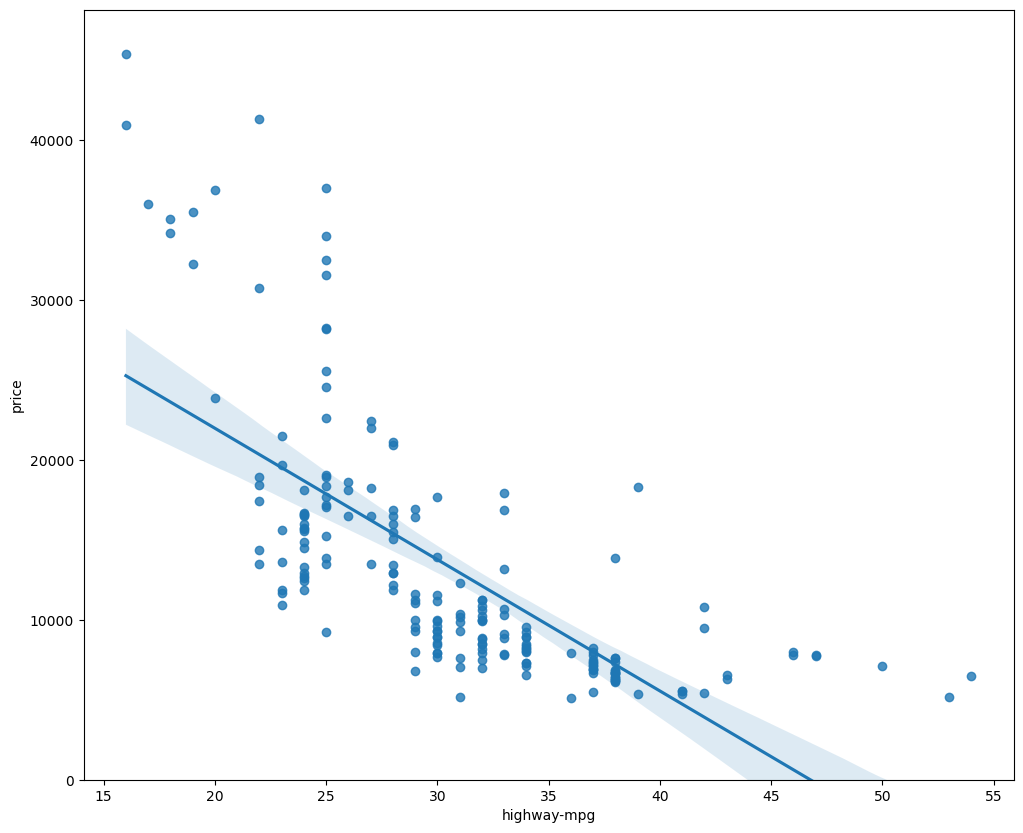

In [48]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

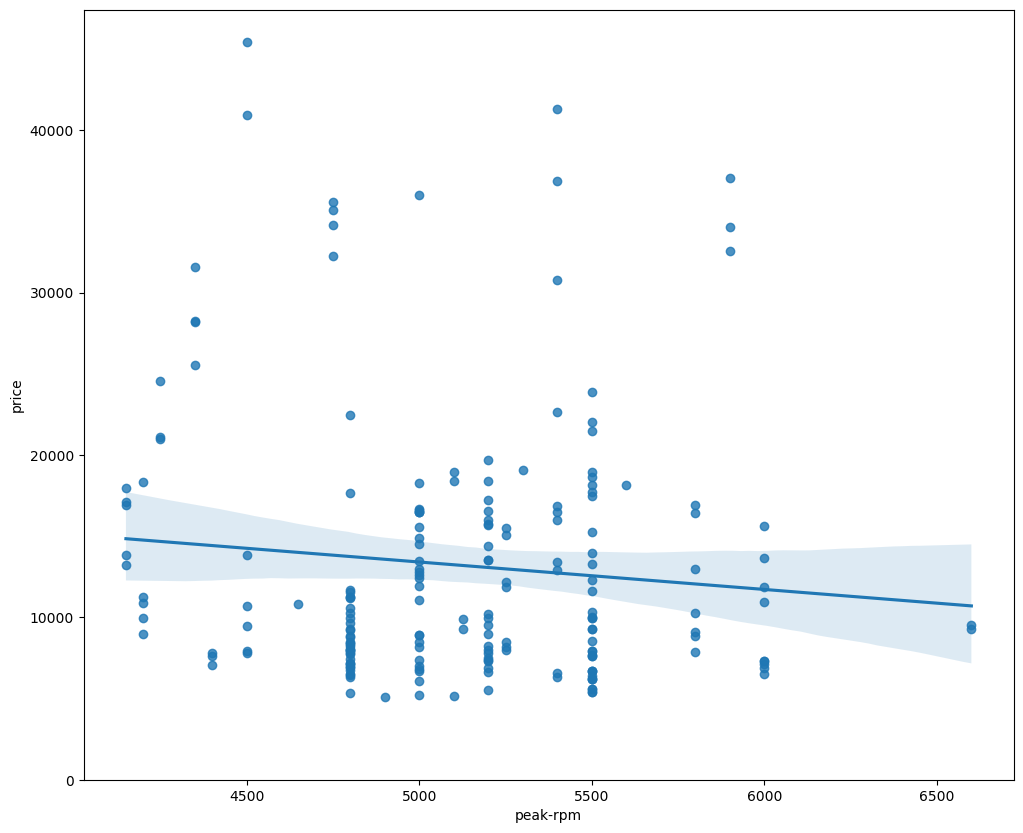

In [49]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

# Question #3:
## Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [50]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# Residual Plot

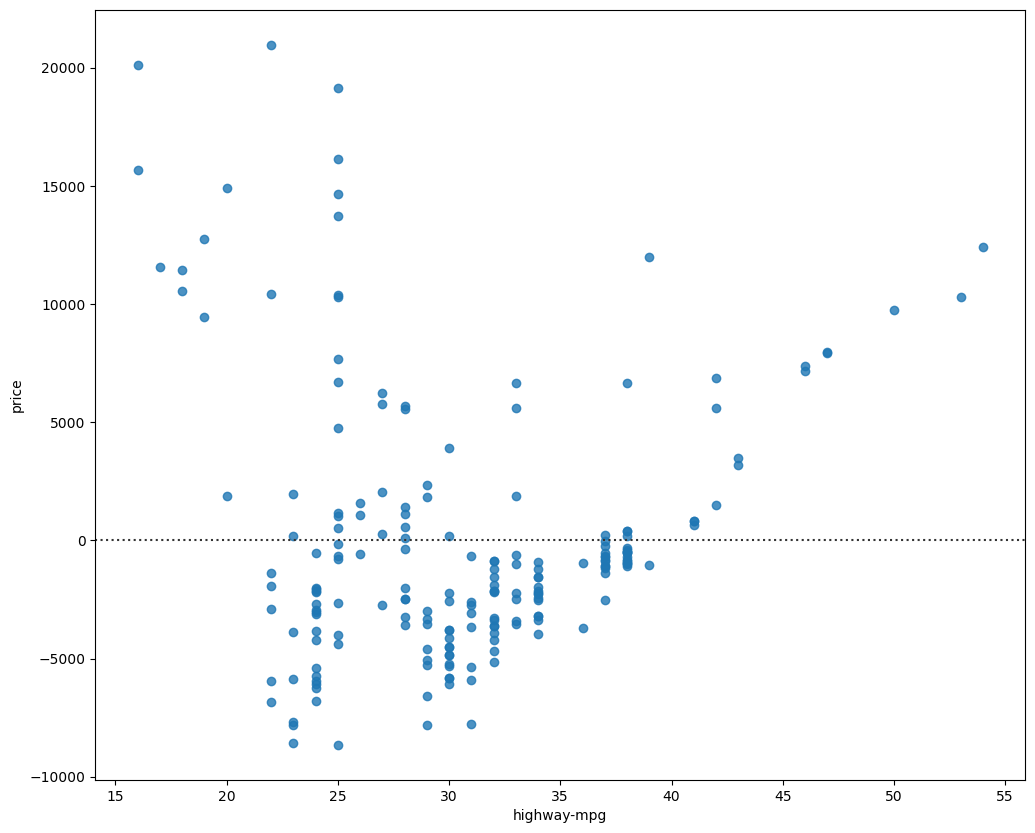

In [51]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

## Multiple Linear Regression

In [52]:
Y_hat = lm.predict(Z)

<ipython-input-53-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-53-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

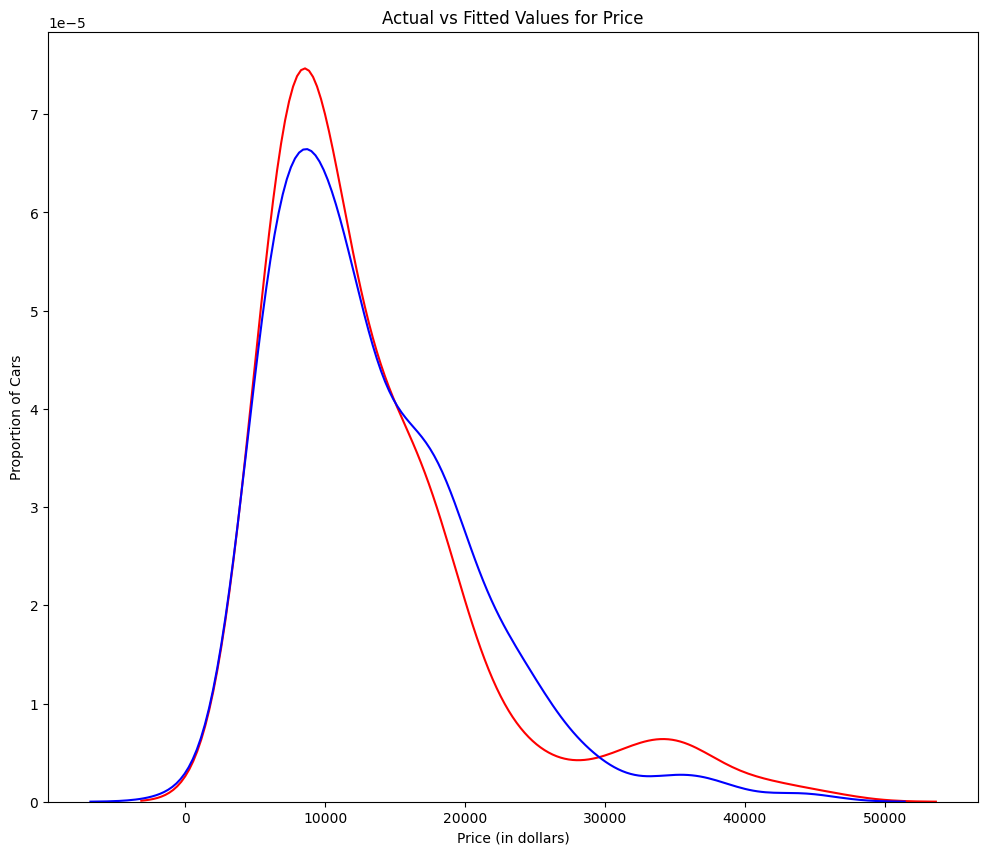

In [53]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# 3. Polynomial Regression and Pipelines

In [54]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [55]:
x = df['highway-mpg']
y = df['price']

In [56]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


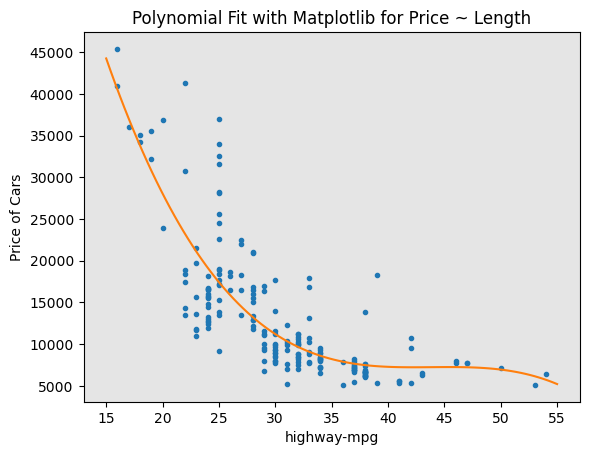

In [57]:
PlotPolly(p, x, y, 'highway-mpg')

In [58]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

# Question #4:
## Create 11 order polynomial model with the variables x and y from above.

In [59]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG'

<class 'SyntaxError'>: incomplete input (<ipython-input-59-76946b928f54>, line 5)

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [62]:
Z_pr=pr.fit_transform(Z)

In [63]:
Z.shape

(201, 4)

In [64]:
Z_pr.shape

(201, 15)

# Pipeline

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [67]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [68]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [69]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Question #5:
## Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [70]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Measures for In-Sample Evaluation

## Model 1: Simple Linear Regression

## Let's calculate the R^2

In [71]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [72]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


# Model 2: Multiple Linear Regression

## Let's calculate the R^2:

In [75]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [76]:
Y_predict_multifit = lm.predict(Z)

In [77]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


# Model 3: Polynomial Fit

In [78]:
from sklearn.metrics import r2_score

In [79]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


# MSE

In [81]:
mean_squared_error(df['price'], p(x))

20474146.426361218

# 5. Prediction and Decision Making
## Prediction
## In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [82]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [83]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [84]:
lm.fit(X, Y)
lm

LinearRegression()

In [85]:
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

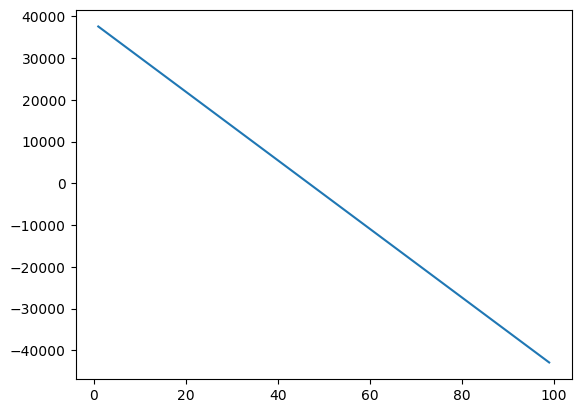

In [86]:
plt.plot(new_input, yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

### Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

### What is a good R-squared value?
### When comparing models, the model with the higher R-squared value is a better fit for the data.

### What is a good MSE?
### When comparing models, the model with the smallest MSE value is a better fit for the data.

### Let's take a look at the values for the different models.
### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

### R-squared: 0.49659118843391759
### MSE: 3.16 x10^7
### Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

### R-squared: 0.80896354913783497
### MSE: 1.2 x10^7
### Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

### R-squared: 0.6741946663906514
### MSE: 2.05 x 10^7

# Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR

### Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

### In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

### MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
### R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
### This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

# Simple Linear Model (SLR) vs. Polynomial Fit

### MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
### R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
### Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable

# Multiple Linear Regression (MLR) vs. Polynomial Fit

### MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
### R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit

# Conclusion

### Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.